In [214]:
!pip3 install xgboost

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [215]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [173]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
print ("Completed Importing")

Completed Importing


In [80]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [174]:
y = train['Survived']

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
train.info
test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [85]:
print (f'Training data has {train.shape[0]} rows \nTraining data has {train.shape[1]} columns')
print (f'Test data has {test.shape[0]} rows \nTraining data has {test.shape[1]} columns')

Training data has 891 rows 
Training data has 12 columns
Test data has 418 rows 
Training data has 11 columns


#First lets find out how many male and female passengers there were

In [86]:
num_males_onboard = train[train['Sex']=='male'].Sex.size
num_females_onboard = train[train['Sex']=='female'].Sex.size
total = num_males_onboard + num_females_onboard

print (f'There were {num_males_onboard} men making up {(num_males_onboard/total * 100)}% of overall members onboard')
print (f'There were {num_females_onboard} women making up {(num_females_onboard/total * 100)}% of overall members onboard')

There were 577 men making up 64.75869809203144% of overall members onboard
There were 314 women making up 35.24130190796858% of overall members onboard


Lets find the average Fare paid 

In [87]:
males = train[train['Sex']=='male']
females = train[train['Sex']=='female']

In [88]:
np.mean(males['Fare'])

25.523893414211443

In [89]:
np.mean(females['Fare'])

44.47981783439491

In [90]:
train[train['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


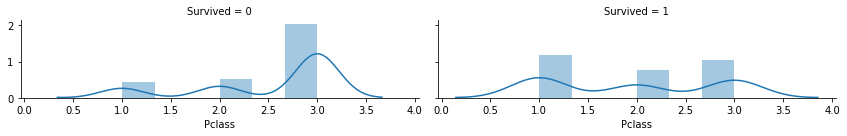

In [91]:
g = sns.FacetGrid(col="Survived", data=train, height = 2, aspect=3)
g.map(sns.distplot, "Pclass", kde=True, bins=6)

In [92]:
survived = train[train['Survived']== 1]
not_survived = train[train['Survived']==0]

In [93]:
survived.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [94]:
survived['Fare'].isna().sum()

0

Average Fare price of those who died and those who survived

In [95]:
print (np.mean(survived['Fare']),np.mean(not_survived['Fare']))

48.39540760233918 22.117886885245902


In [96]:
train['Fare'].std()

49.6934285971809

In [97]:
def group_age(df, group_vals, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age"]=pd.cut(df["Age"], bins=group_vals, labels=label_names)
    return df
  
group_vals=[-1, 0, 3, 12, 19, 35, 60, 80]
label_names=["Missing", "Infants", "Children", "Teens", "Young Adults", "Middle-Age Adults", "Seniors"]
train=group_age(train, group_vals, label_names)
test=group_age(test, group_vals, label_names)

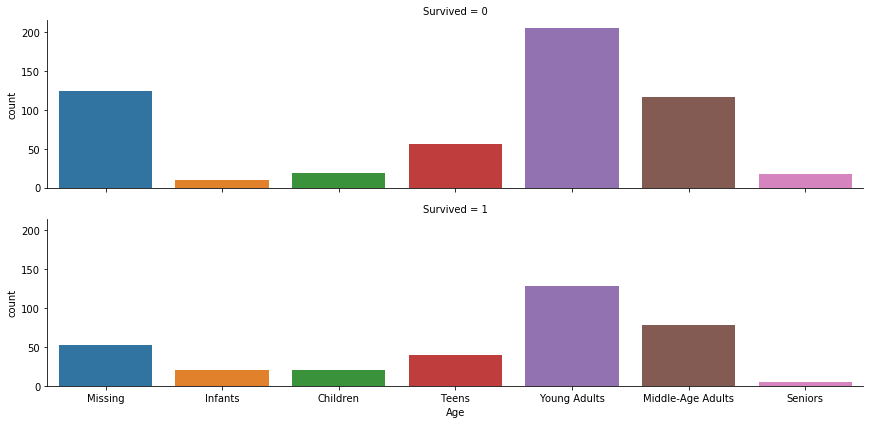

In [98]:
sns.catplot(x="Age", row="Survived", kind="count", height=3, aspect=4, data=train)

In [99]:
pd.crosstab(train['Survived'],  train['Age'])

Age,Missing,Infants,Children,Teens,Young Adults,Middle-Age Adults,Seniors
Survived,,,,,,,
0,125,10,19,56,205,117,17
1,52,20,20,39,128,78,5


In [100]:
had_siblings = train[train['SibSp'] > 0]

Let's find out how many members were in each family (if applicable) 

In [101]:
def all_fam_mem(df):
    #takes in a dataframe, adds up the siblings and
    #parents and creates a new column with that information, then drops the siblings and Parch columns
    df["AllFam"]= df["Parch"] + df["SibSp"]
    df=df.drop(["SibSp", "Parch"], axis=1)
    return df

train = all_fam_mem(train)
test = all_fam_mem(test)

In [102]:
train.groupby('AllFam').Survived.mean() * 100

AllFam
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64

Let's look at how many of each Sex surivived

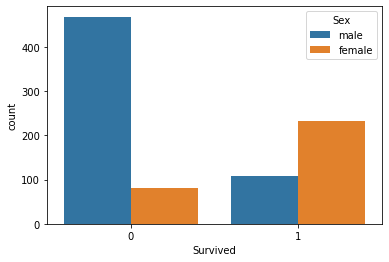

In [103]:
sns.countplot(x='Survived', hue="Sex", data=train)

Next, lets look at survival amongst the ages

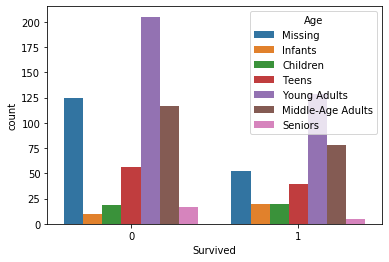

In [104]:
sns.countplot(x='Survived', hue="Age", data=train)

In [105]:
survival_by_age = train.groupby('Age')['Survived'].agg(['count'])

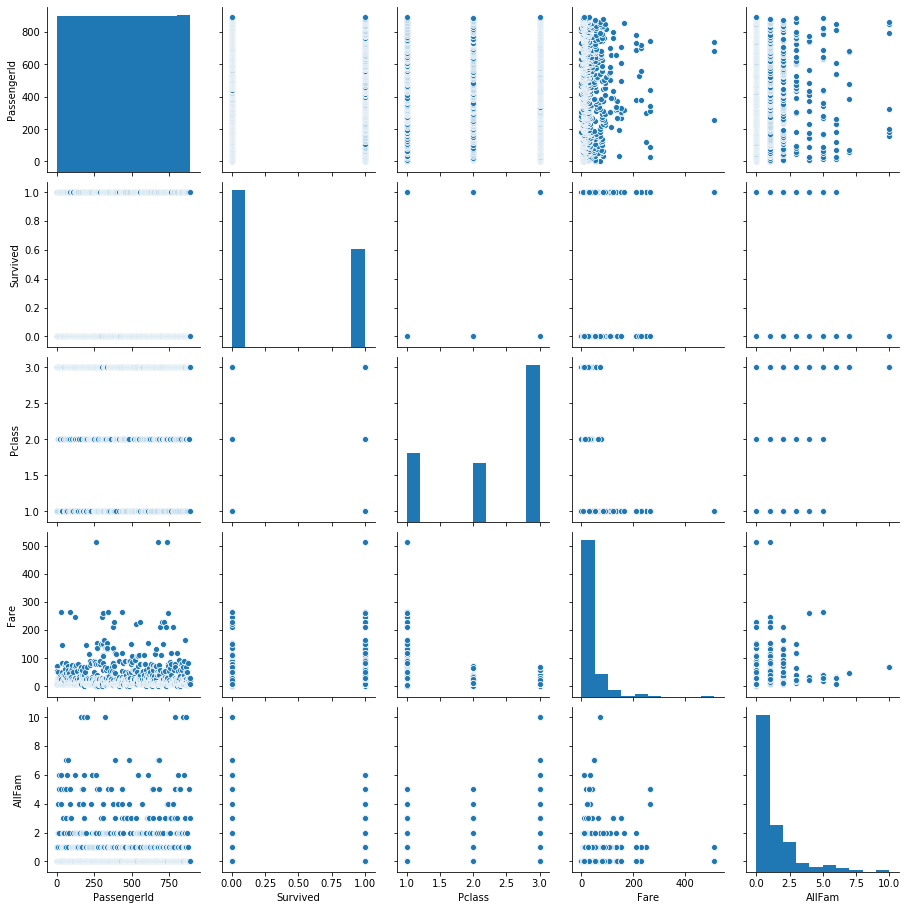

In [106]:
sns.pairplot(train)

In [107]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

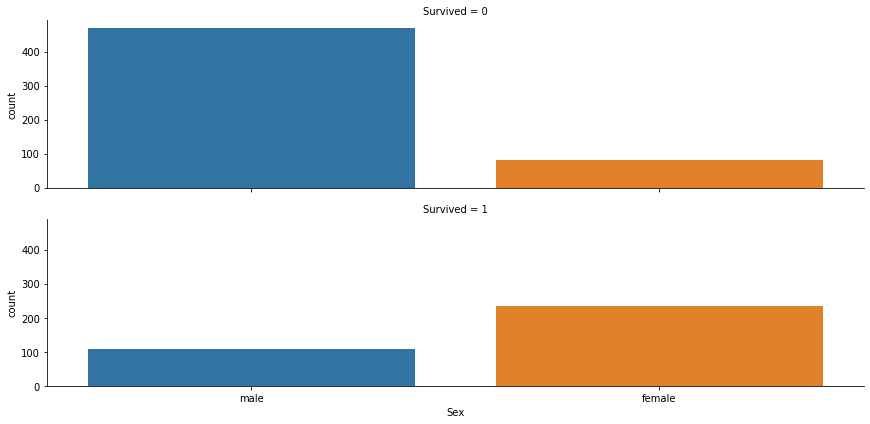

In [108]:
sns.catplot(x="Sex", row="Survived", kind="count", height=3, aspect=4, data=train)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AllFam
0,1,0,3,"Braund, Mr. Owen Harris",male,Young Adults,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle-Age Adults,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adults,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adults,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,Young Adults,373450,8.0500,NaN,S,0


In [110]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [111]:
pd.crosstab(train['Sex'],  train['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


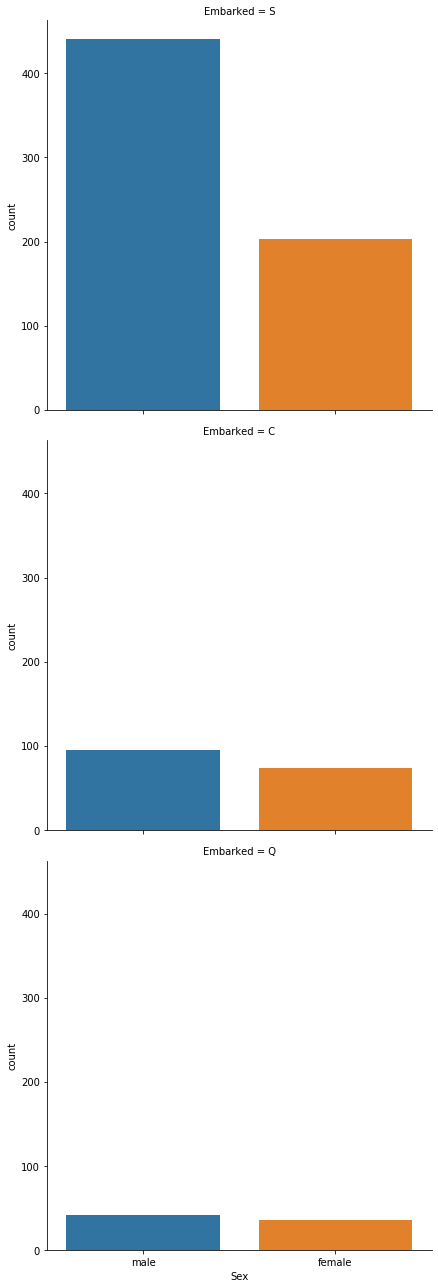

In [112]:
sns.catplot(x="Sex", row="Embarked", kind="count", height=6, aspect=1, data=train)

Let's compare avg fare for different titles
First we will create a new column titled 'Title' to hold our titles

In [113]:
train['Title']=train['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
test['Title']=train['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [129]:
train.groupby('Title').Fare.mean()

Title
Capt            71.000000
Col             31.025000
Don             27.720800
Dr              49.168457
Jonkheer         0.000000
Lady            39.600000
Major           28.525000
Master          34.703125
Miss            43.797873
Mlle            59.402100
Mme             69.300000
Mr              24.441560
Mrs             45.138533
Ms              13.000000
Rev             18.312500
Sir             56.929200
the Countess    86.500000
Name: Fare, dtype: float64

In [135]:
title_mean = train.groupby('Title').Fare.mean()

In [136]:
title_mean

Title
Capt            71.000000
Col             31.025000
Don             27.720800
Dr              49.168457
Jonkheer         0.000000
Lady            39.600000
Major           28.525000
Master          34.703125
Miss            43.797873
Mlle            59.402100
Mme             69.300000
Mr              24.441560
Mrs             45.138533
Ms              13.000000
Rev             18.312500
Sir             56.929200
the Countess    86.500000
Name: Fare, dtype: float64

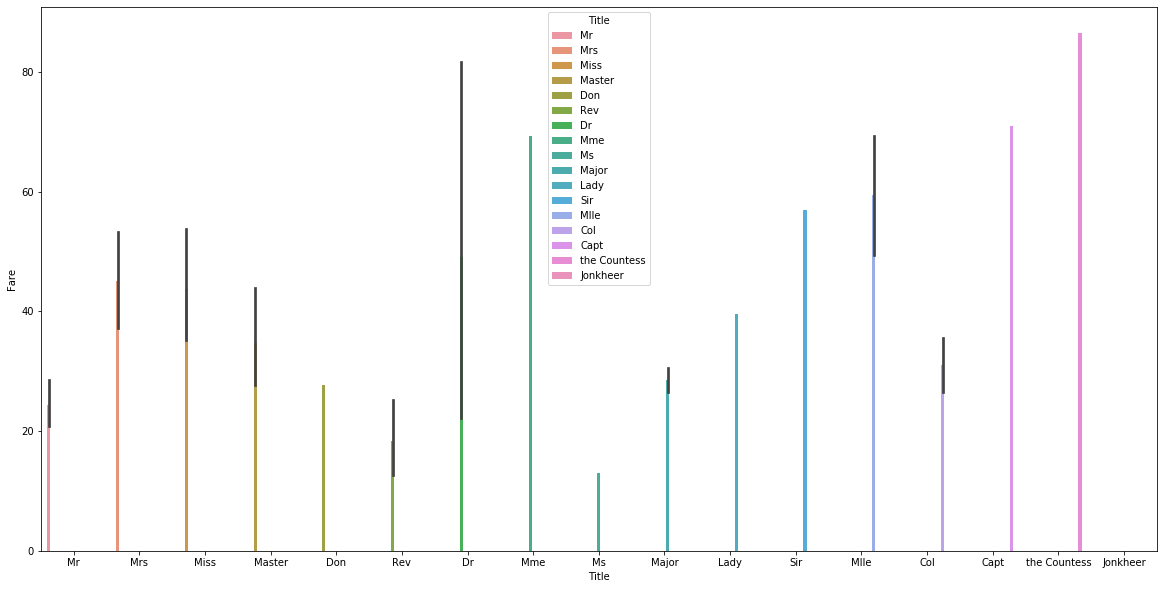

In [165]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='Title', y= 'Fare', hue='Title', data = train, estimator = np.mean, ax = ax)

In [170]:
test.head

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AllFam,Title
0,892,3,"Kelly, Mr. James",male,Young Adults,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Middle-Age Adults,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,Seniors,240276,9.6875,NaN,Q,0,Miss
3,895,3,"Wirz, Mr. Albert",male,Young Adults,315154,8.6625,NaN,S,0,Mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Young Adults,3101298,12.2875,NaN,S,2,Mr


In [189]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AllFam,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,Young Adults,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle-Age Adults,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adults,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adults,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,Young Adults,373450,8.0500,NaN,S,0,Mr


# Let's handle some of the missing data  

In [206]:
for col in train.columns: 
    print (col, train[col].isnull().values.any())
    
for col in test.columns: 
    print (col, train[col].isnull().values.sum())
    



PassengerId False
Survived False
Pclass False
Name False
Sex False
Age False
Ticket False
Fare False
Cabin False
Embarked False
AllFam False
Title False
PassengerId 0
Pclass 0
Name 0
Sex 0
Age 0
Ticket 0
Fare 0
Cabin 0
Embarked 0
AllFam 0
Title 0


We will fill the missing data in Embarked with the most common port

In [192]:
train["Embarked"]=train["Embarked"].fillna(train["Embarked"].mode()[0])
test["Embarked"]=test["Embarked"].fillna(test["Embarked"].mode()[0])

In [203]:
train['Cabin'] = train['Cabin'].fillna('Not Provided')

In [201]:
for col in test.columns: 
    print (col, test[col].isnull().values.sum())

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 0
Ticket 0
Fare 1
Cabin 327
Embarked 0
AllFam 0
Title 0


In [205]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [207]:
train=train.drop(["Survived", "Cabin", "Ticket"], axis=1)
test=test.drop(["Cabin", "Ticket"], axis=1)

In [208]:
print 


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,AllFam,Title
0,1,3,"Braund, Mr. Owen Harris",male,Young Adults,7.2500,S,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle-Age Adults,71.2833,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,Young Adults,7.9250,S,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adults,53.1000,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,Young Adults,8.0500,S,0,Mr


In [209]:
print (train.shape, test.shape)

(891, 9) (418, 9)


In [210]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)

features = ["Pclass", "Name", "Sex", "Age", "Fare", "Embarked", "AllFam", "Title"]

OHE_train_cols = pd.DataFrame(OHE.fit_transform(train[features]))
OHE_test_cols = pd.DataFrame(OHE.transform(test[features]))

OHE_train_cols.index = train.index
OHE_test_cols.index = test.index

num_train=train.drop(features, axis=1)
num_test=test.drop(features, axis=1)

train = pd.concat([num_train, OHE_train_cols], axis=1)
test = pd.concat([num_test, OHE_test_cols], axis=1)

In [217]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb=XGBClassifier(objective='reg:logistic')

params={
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9],
    'colsample_bytree': [ 0.4, 0.6, 0.8],
    'subsample': [0.8, 0.9, 1],
    'gamma': [0, 0.5, 1]
}

model=RandomizedSearchCV(xgb, param_distributions=params, n_iter=100, n_jobs=-1, verbose=1)
model.fit(train, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monoto...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'

In [218]:
score = model.best_score_
params = model.best_params_
print("Best score: ", score)
print("Best parameters: ", params)

Best score:  0.8215488215488216
Best parameters:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.4}


In [220]:
pred = model.predict(test)

In [222]:
result = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred})
result.to_csv('kaggleSubmission.csv', index=False)
print("Result Saved")

Result Saved


In [226]:
test.head(20)

,PassengerId,0,1,2,3,4,5,6,7,8,...,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179
0,892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,893,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,894,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,897,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,898,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,899,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,900,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,901,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
